In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Load the data

In [2]:
housing = pd.read_excel('1553768847_housing.xlsx')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
X = housing.drop('median_house_value',axis=1)

In [6]:
y = housing['median_house_value']

In [7]:
X.shape

(20640, 9)

In [8]:
y.shape

(20640,)

# Handling Missing Data

In [9]:
X.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [10]:
X['total_bedrooms'][X['total_bedrooms'].isnull()] = np.mean(X['total_bedrooms'])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
X.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [12]:
y.isnull().sum()

0

In [13]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
X['ocean_proximity'] = le.fit_transform(X['ocean_proximity'])

In [19]:
X['ocean_proximity'].unique()

array([3, 0, 1, 4, 2])

# Split the Train and Test Data

In [20]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

# Standardize the Data

In [22]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
X_train_std = scaler.fit_transform(X_train)

In [26]:
X_test_std = scaler.fit_transform(X_test)

# Perform Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train_std,y_train)

LinearRegression()

In [30]:
model.score(X_train_std,y_train) # Training Accuracy Score

0.6320295308858719

In [31]:
y_preds = model.predict(X_test_std)

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
mse = mean_squared_error(y_test,y_preds)

In [34]:
rmse = np.sqrt(mse)

In [35]:
print(rmse)

68876.74950417971


# Perform Decision Tree Regression

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
decTree = DecisionTreeRegressor(min_samples_split=5)

In [44]:
decTree.fit(X_train_std,y_train)

DecisionTreeRegressor(min_samples_split=5)

In [45]:
decTree.score(X_train_std,y_train)

0.980124120272848

In [46]:
treePredictions = decTree.predict(X_test_std)

In [47]:
rmse_tree = np.sqrt(mean_squared_error(y_test,treePredictions))

In [48]:
print(rmse_tree)

81933.2648128791


# Perform Random Forest Regression

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
forest_reg = RandomForestRegressor()

In [51]:
forest_reg.fit(X_train_std,y_train)

RandomForestRegressor()

In [52]:
forest_reg.score(X_train_std,y_train)

0.9747038613765548

In [53]:
forest_predictions = forest_reg.predict(X_test_std)

In [54]:
rmse_forest = np.sqrt(mean_squared_error(y_test,forest_predictions))

In [55]:
print(rmse_forest)

60825.78199341812


# Bonus Exercise - Perform LR with one independent variable

In [56]:
X_train_slr = X_train['median_income']

In [58]:
X_test_slr = X_test['median_income']

In [59]:
model_slr = LinearRegression()

In [62]:
model_slr.fit(X_train_slr.values.reshape(-1,1),y_train)

LinearRegression()

In [63]:
model_slr.score(X_train_slr.values.reshape(-1,1),y_train)

0.47042402242884873

In [65]:
y_preds_slr = model_slr.predict(X_test_slr.values.reshape(-1,1))

In [66]:
rmse_slr = np.sqrt(mean_squared_error(y_test, y_preds_slr))

In [67]:
print(rmse_slr)

83507.53728768947


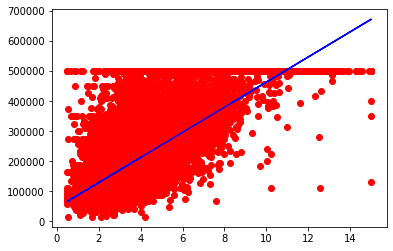

In [70]:
plt.scatter(X_train_slr,y_train,color='red')
plt.plot(X_train_slr,model_slr.predict(X_train_slr.values.reshape(-1,1)),color='blue')

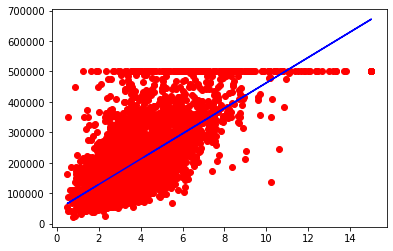

In [72]:
plt.scatter(X_test_slr,y_test,color='red')
plt.plot(X_test_slr,y_preds_slr,color='blue')

In [76]:
from sklearn.metrics import r2_score

In [77]:
r2_score(y_test,y_preds_slr)

0.4852678978472138

# Conclusions:

1. Talk about the data
2. Talk about the model strategies
3. Performance of each model (R2 Score and RMSE Values)
4. Insights
5. Say whether this model can be used for production or not ? Or does it still need any improvements ?